# N0.5

In [36]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [37]:
xo = 0.33
to = 0.5
do = 0.68
ep = 1e-3
c  = 0.5

x = linspace(0,1)

ro = (1/sqrt(2*pi*ep))*to

#beta_o of the system
bo = do/(ro+1)
print("beta_o of the system =",bo)

#delta functin
def delta(x,xo,ep,t,to):
    A = 1/sqrt(2*pi*ep)
    B = ((x-xo-(c*(t-to)))**2)/(4*ep)
    return A*exp(-B)

def H(t,to):
    if t-to >= 0:
        return 1
    else:
        return 0

def ucap(x,xo,t,to,do,ep,bo):
    B = t +(t-to)*H(t,to)   
    return bo*delta(x,xo,ep,t,to)*B

beta_o of the system = 0.09305086168724995


<IPython.core.display.Javascript object>


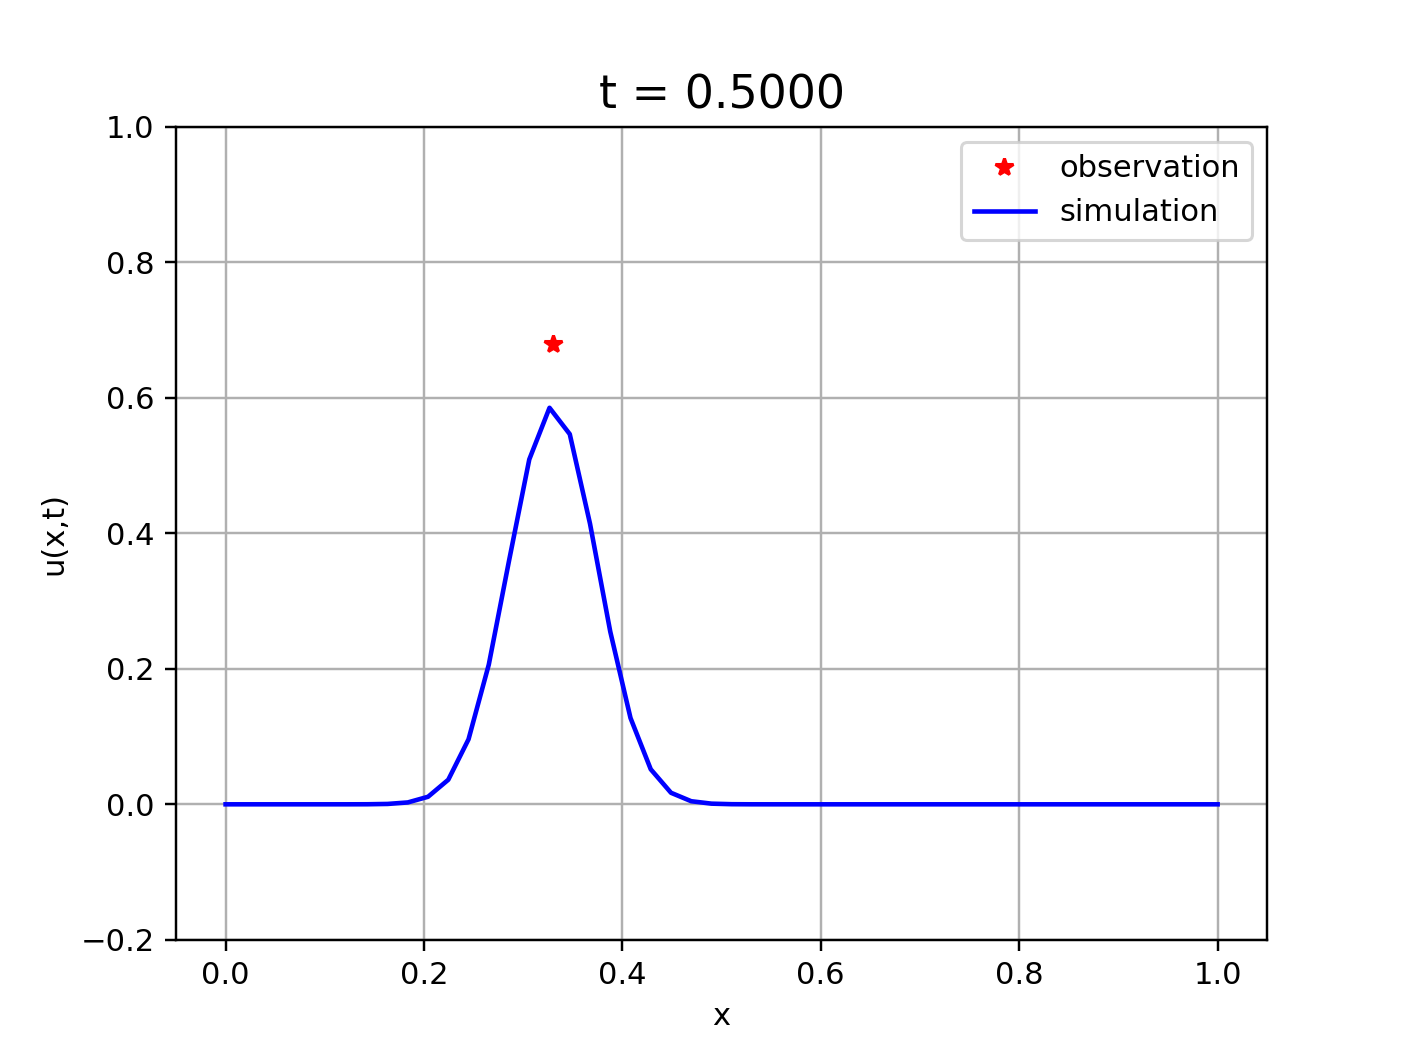

In [39]:
uint = ucap(x,xo,0,to, do,ep,bo) #when t=0

fig = figure(1)

plot(xo,do,'r*',label='observation')

hdl,= plot(x,uint,'b-',label='simulation')


xlabel('x')
ylabel('u(x,t)')
ylim(-0.2,1.0)
legend()
tstr = 't = {:.4f}'
htitle = title(tstr.format(0),fontsize=15)
grid()

t = linspace(0,0.5)

for i in range(len(t)):
    
    u = ucap(x,xo,t[i],to,do,ep,bo)
    
    hdl.set_ydata(u)
    htitle.set_text(tstr.format(t[i]))
    
    pause(0.1)

    fig.canvas.draw()